In [1]:
import tensorflow as tf
# import tensorflow.keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, precision_score, recall_score,f1_score
import seaborn as sns
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(f'Number of images in X_train = {X_train.shape[0]}')
print(f'Number of images in X_test = {X_test.shape[0]}')
print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
y_train = y_train.reshape(-1,)  # to flatten the array of classes of images
classes = ["airplane", "automobile", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck"]


def showImage(X, y, index):
    plt.figure(figsize=(3, 3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


def showImages(X, y, index1, index2):
    for i in range(index1, index2+1):
        plt.figure(figsize=(3, 3))
        plt.imshow(X[i])
        plt.xlabel(classes[y[i]])


# Data Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0


def y_pred_classes(y_pred):
    y_pred_classes_ = np.array([np.argmax(element) for element in y_pred])
    return y_pred_classes_


def plot_CM():
    cm = confusion_matrix(y_pred=y_pred_classes(), y_true=y_test)
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix using ANN')
    plt.show()

def plot_classification_report():
    print("Classification Report: \n", classification_report(y_test, y_pred_classes()))
def goodness(y_pred, y_true):
    print(f"Precision is {precision_score(y_true=y_true,y_pred=y_pred)}")

170498071/170498071 [==============================] - 17s 0us/step
Number of images in X_train = 50000
Number of images in X_test = 10000
Shape of X_train = (50000, 32, 32, 3)
Shape of y_train = (50000, 1)


In [3]:
cnn1=models.Sequential([
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn1.fit(X_train, y_train, epochs=25)
cnn1.evaluate(X_test,y_test)

Epoch 1/25
1563/1563 [==============================] - 15s 4ms/step - loss: 1.5622 - accuracy: 0.4273
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1764 - accuracy: 0.5841
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0187 - accuracy: 0.6415
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9176 - accuracy: 0.6806
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8369 - accuracy: 0.7066
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7742 - accuracy: 0.7305
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7242 - accuracy: 0.7458
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6737 - accuracy: 0.7647
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6294 - accuracy: 0.7812
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.58

[1.447264313697815, 0.6912000179290771]

In [4]:
cnn1.save("cnn1.h5")
cnn1.save("cnn1.keras")

In [5]:
cnn2=models.Sequential([
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn2.fit(X_train, y_train, epochs=25)
cnn2.evaluate(X_test,y_test)

Epoch 1/25
1563/1563 [==============================] - 10s 5ms/step - loss: 1.6593 - accuracy: 0.3824
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3040 - accuracy: 0.5307
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1564 - accuracy: 0.5916
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0561 - accuracy: 0.6291
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9868 - accuracy: 0.6528
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9263 - accuracy: 0.6748
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8708 - accuracy: 0.6949
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8266 - accuracy: 0.7087
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7803 - accuracy: 0.7266
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.73

[1.2782493829727173, 0.6830999851226807]

In [6]:
cnn2.save("cnn2.h5")
cnn2.save("cnn2.keras")

In [7]:
cnn3=models.Sequential([
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn3.fit(X_train, y_train, epochs=25)
cnn3.evaluate(X_test,y_test)

Epoch 1/25
1563/1563 [==============================] - 9s 4ms/step - loss: 1.6531 - accuracy: 0.3850
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2932 - accuracy: 0.5339
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1774 - accuracy: 0.5816
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0962 - accuracy: 0.6110
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0337 - accuracy: 0.6332
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9790 - accuracy: 0.6540
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9360 - accuracy: 0.6672
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8974 - accuracy: 0.6821
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8621 - accuracy: 0.6945
Epoch 10/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.831

[1.2115119695663452, 0.6597999930381775]

In [8]:
cnn3.save("cnn3.h5")
cnn3.save("cnn3.keras")

In [9]:
cnn4=models.Sequential([
    
    layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn4.fit(X_train, y_train, epochs=25)
cnn4.evaluate(X_test,y_test)

Epoch 1/25
1563/1563 [==============================] - 10s 5ms/step - loss: 1.6353 - accuracy: 0.3963
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2277 - accuracy: 0.5627
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0701 - accuracy: 0.6213
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9662 - accuracy: 0.6601
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8928 - accuracy: 0.6852
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8237 - accuracy: 0.7097
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7753 - accuracy: 0.7278
Epoch 8/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7257 - accuracy: 0.7421
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6883 - accuracy: 0.7555
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.64

[1.243499755859375, 0.6973000168800354]

In [10]:
cnn4.save("cnn4.h5")
cnn4.save("cnn4.keras")

In [13]:
cnn5=models.Sequential([
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn5.fit(X_train, y_train, epochs=25)
cnn5.evaluate(X_test,y_test)

Epoch 1/25
1563/1563 [==============================] - 9s 4ms/step - loss: 1.5685 - accuracy: 0.4108
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1716 - accuracy: 0.5851
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0247 - accuracy: 0.6464
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8804 - accuracy: 0.6957
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7719 - accuracy: 0.7301
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6891 - accuracy: 0.7604
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6237 - accuracy: 0.7837
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5572 - accuracy: 0.8053
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4889 - accuracy: 0.8300
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.437

[1.5449120998382568, 0.7218000292778015]

In [14]:
cnn5.save("cnn5.h5")
cnn5.save("cnn5.keras")

In [38]:
def plot_CM(y_pred_classes,i):
    cm = confusion_matrix(y_test,y_pred_classes)
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix using CNN')
    plt.savefig(f"CM{i}.jpg")
    plt.show()

In [39]:
number_of_models=5

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model_list=[]
for i in range(1,number_of_models+1):
    model_list.append(load_model(f"cnn{i}.keras"))

In [42]:
y_predictions=[]
for i in range(0,number_of_models):
    y_predictions.append(model_list[i].predict(X_test))

313/313 [==============================] - 1s 2ms/step


In [43]:
y_predictions_classes=y_predictions
for i in range(number_of_models):
    y_predictions_classes[i]=y_pred_classes(y_predictions[i])

In [44]:
y_predictions_classes

[array([3, 8, 9, ..., 5, 1, 7]),
 array([3, 8, 8, ..., 5, 1, 7]),
 array([3, 1, 8, ..., 5, 4, 7]),
 array([3, 8, 8, ..., 5, 1, 7]),
 array([3, 8, 8, ..., 4, 4, 5])]

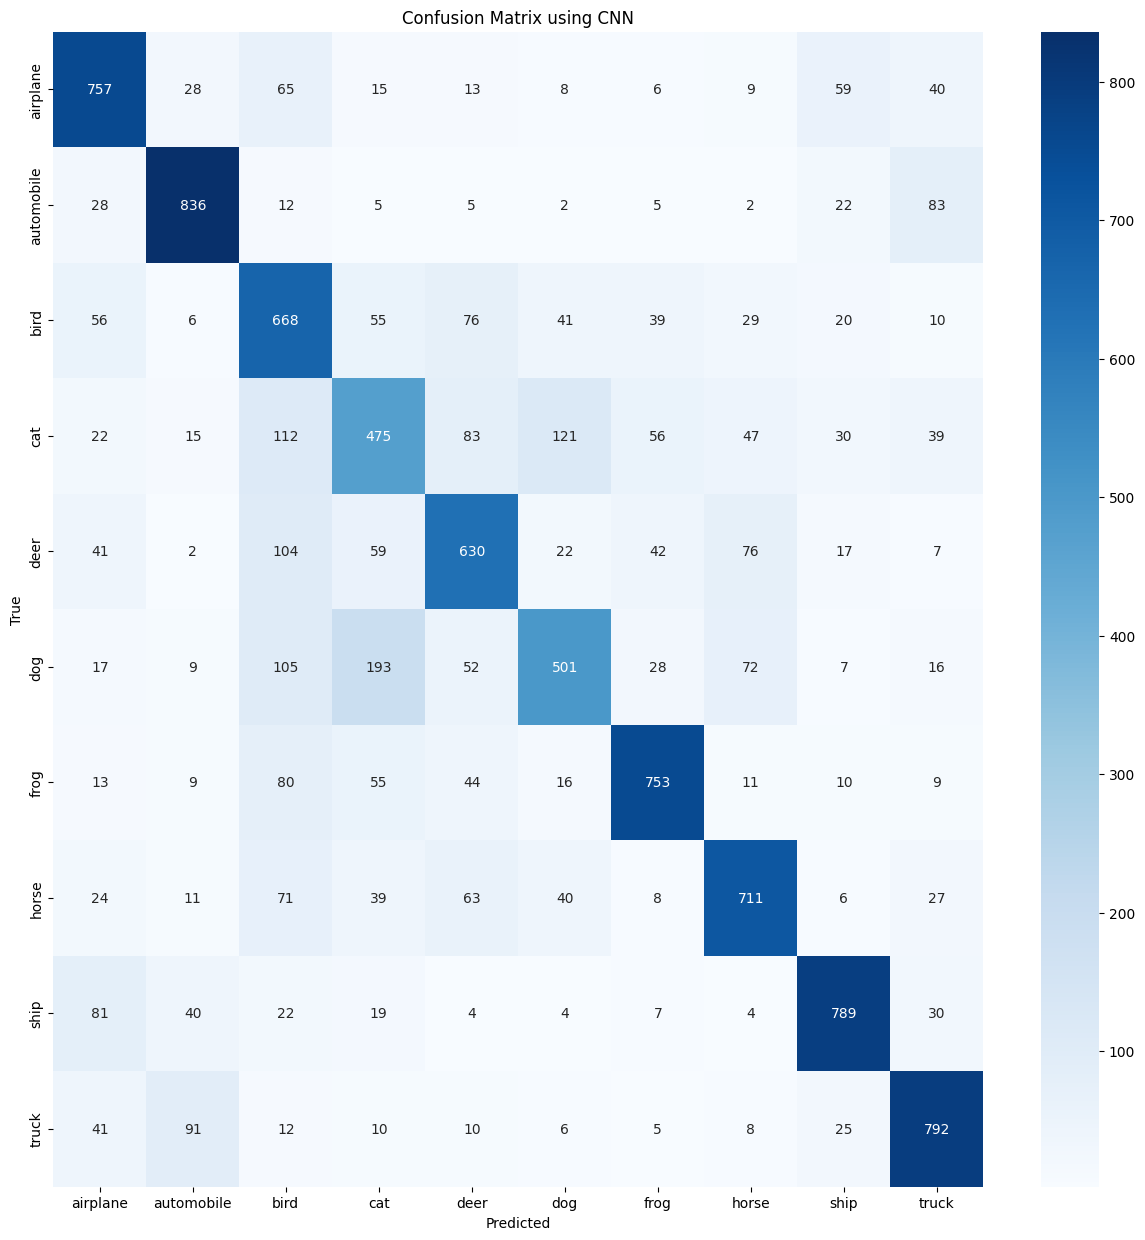

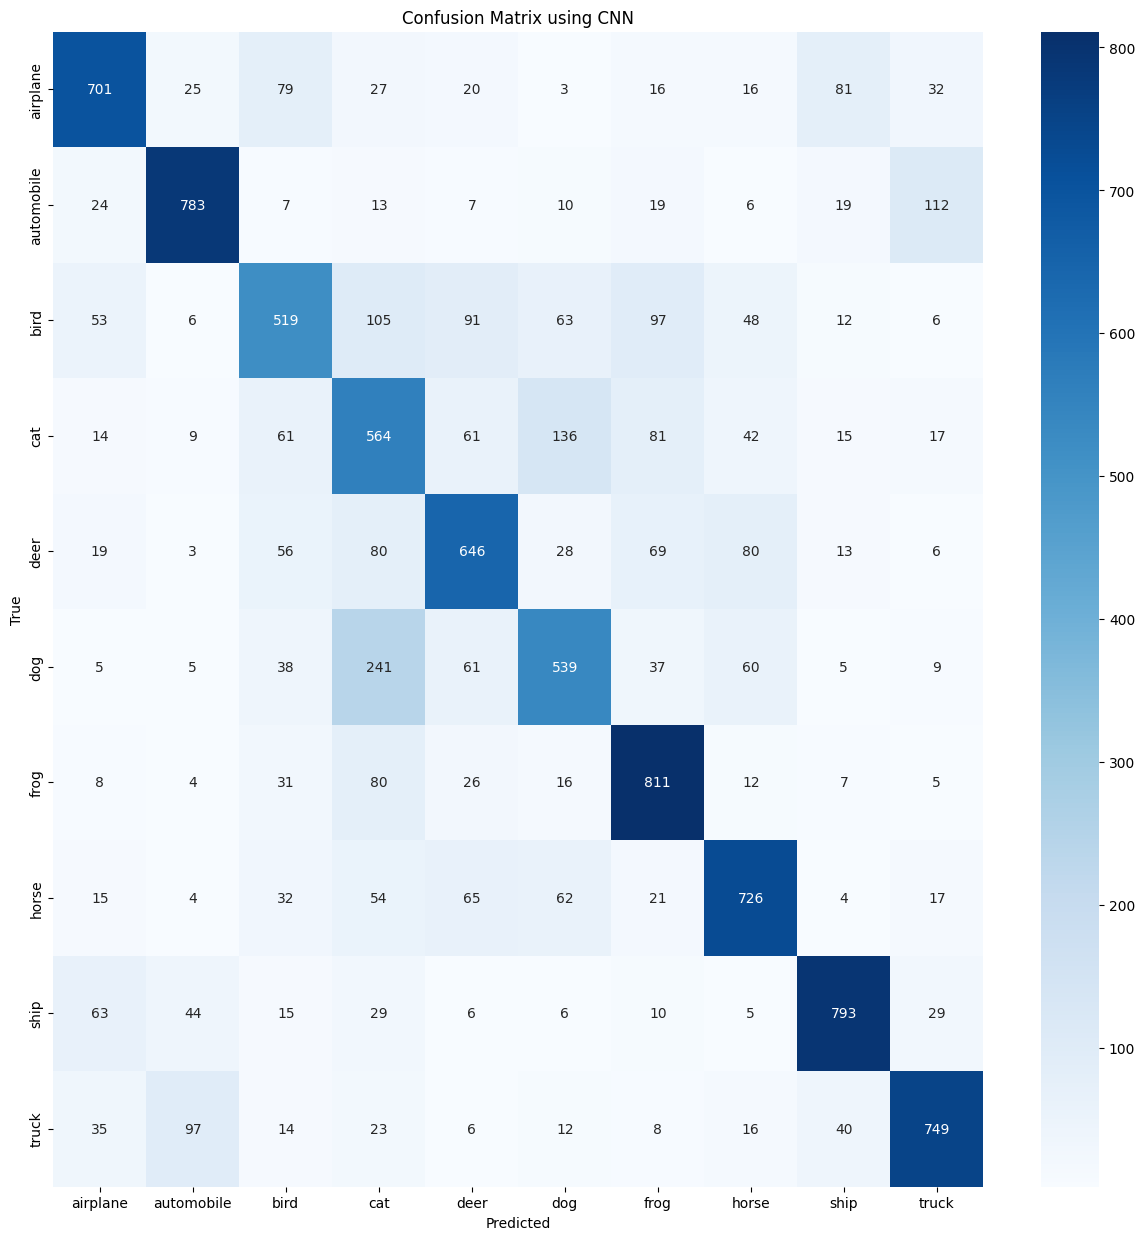

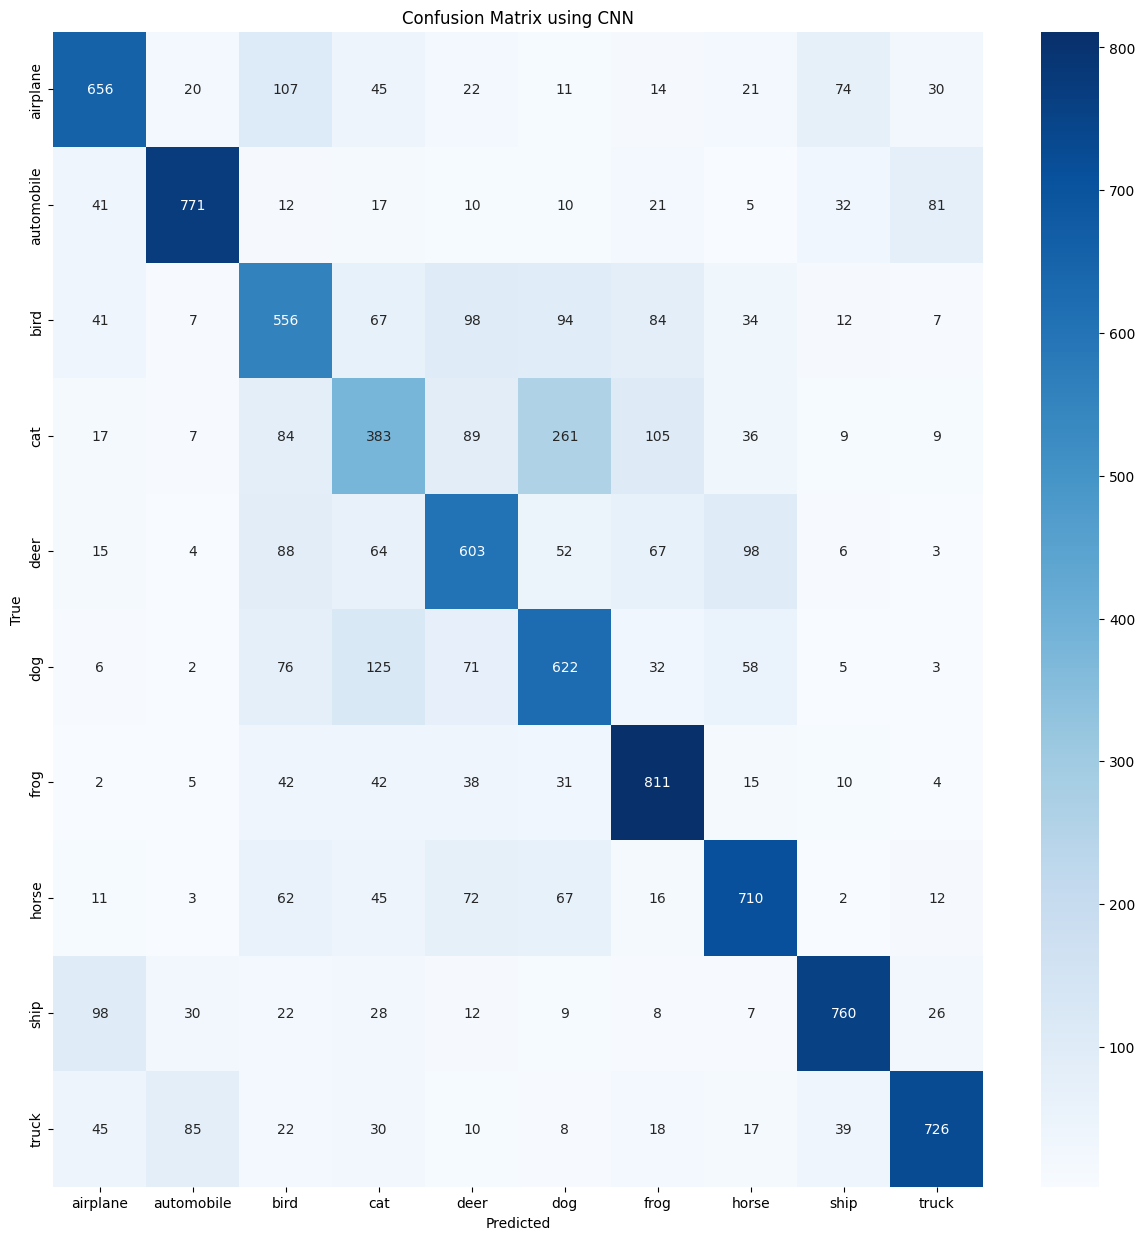

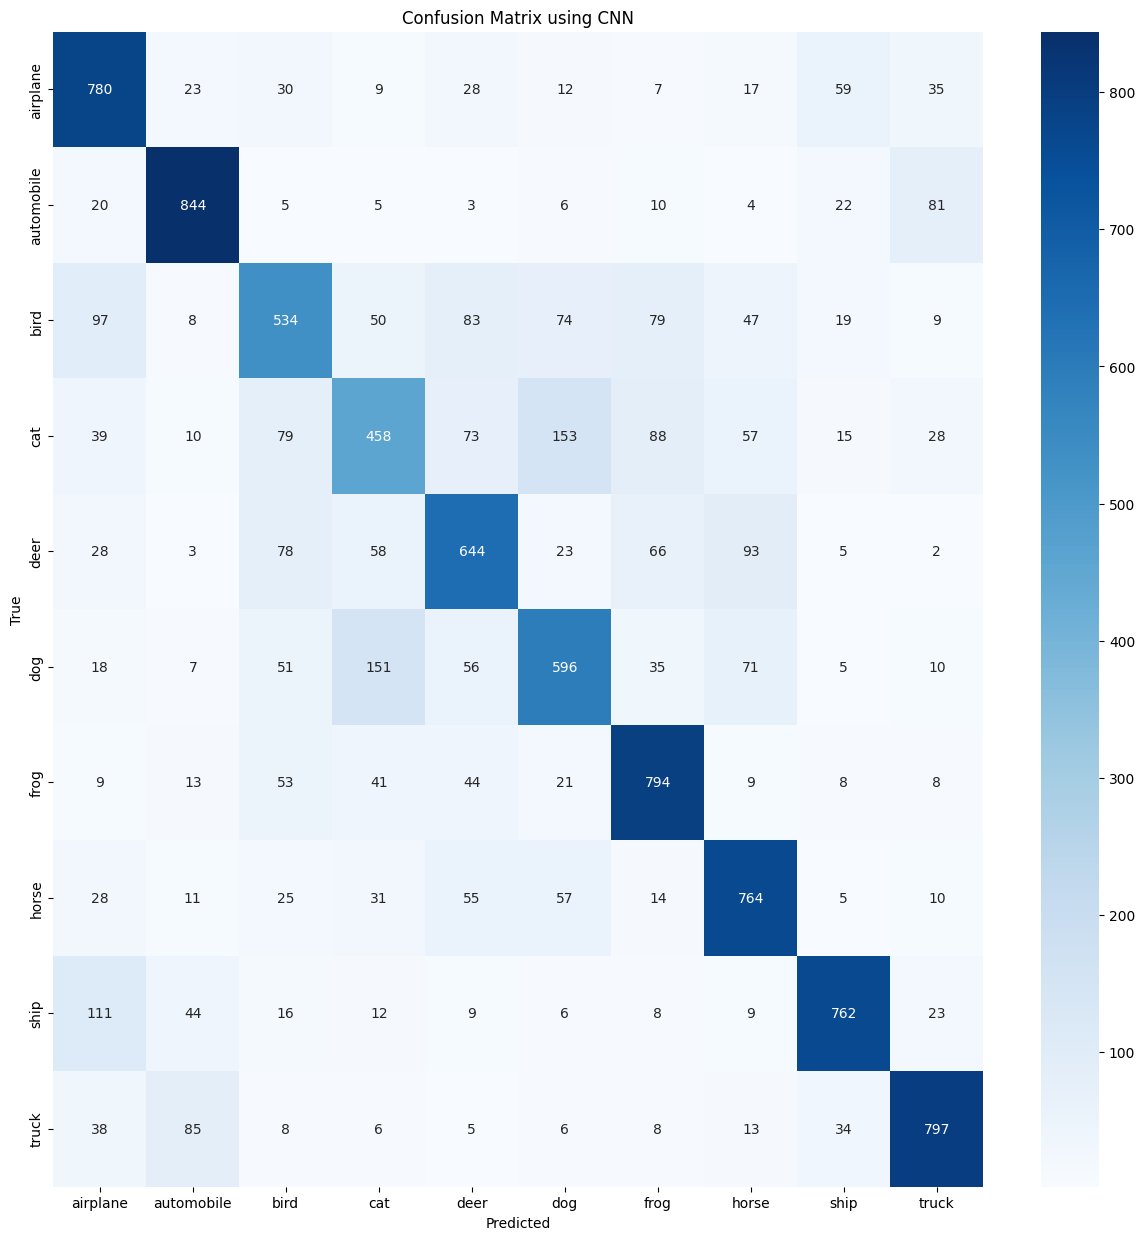

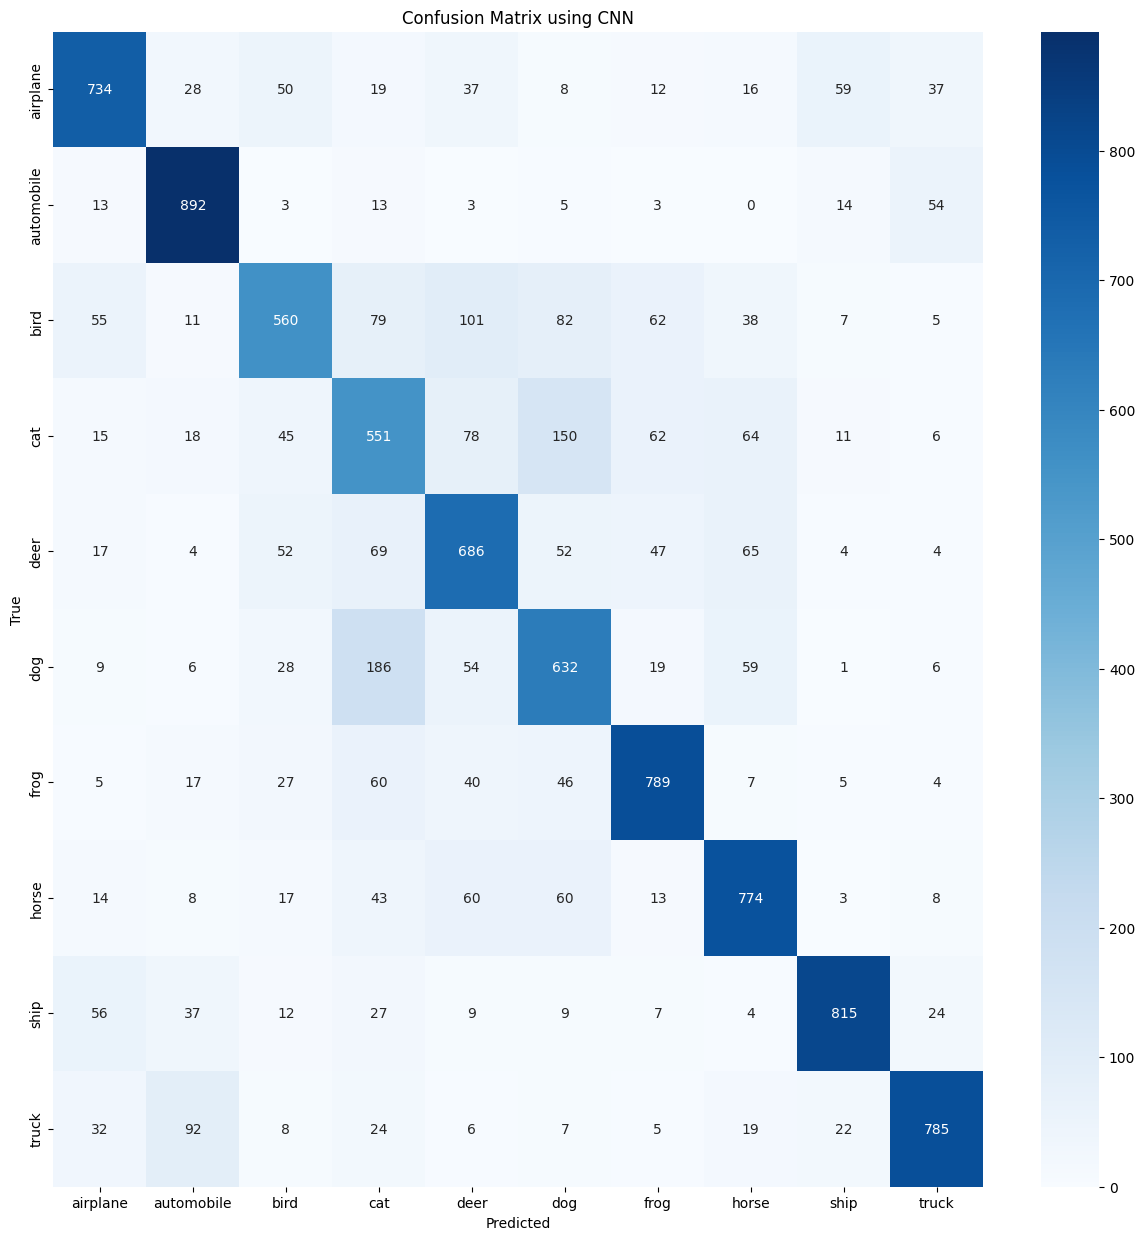

In [45]:
for i in range(number_of_models):
    plot_CM(y_predictions_classes[i],i+1)

In [46]:
Accuracy=[]
Precision_weighted=[]
Precision_macro=[]
Precision=[]
Recall_Score=[]
Recall_Score_macro=[]
Recall_Score_weighted=[]
F1_Score=[]
Classificaion_Reports= []

for i in range(number_of_models):
    Precision_macro.append(precision_score(y_test,y_predictions_classes[i],average='macro'))
    Precision_weighted.append(precision_score(y_test,y_predictions_classes[i],average='weighted'))
    Precision.append(precision_score(y_test,y_predictions_classes[i],average=None))
        
    Recall_Score_macro.append(recall_score(y_test,y_predictions_classes[i],average='macro'))
    Recall_Score_weighted.append(recall_score(y_test,y_predictions_classes[i],average='weighted'))
    Recall_Score.append(recall_score(y_test,y_predictions_classes[i],average=None))

    Accuracy.append(accuracy_score(y_test,y_predictions_classes[i]))
    Classificaion_Reports.append(classification_report(y_test,y_predictions_classes[i],target_names=classes))
    F1_Score.append(f1_score(y_test,y_predictions_classes[i],average='macro'))


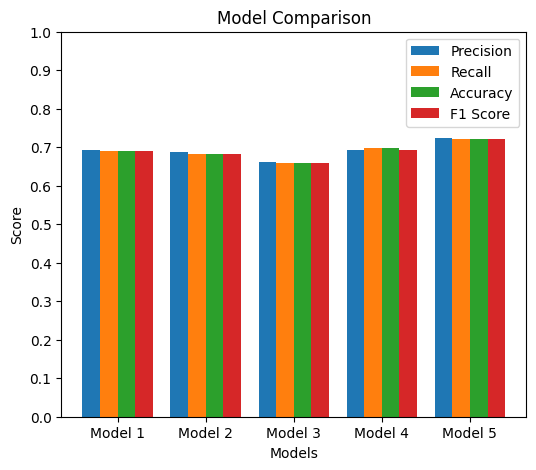

In [47]:
plt.figure(figsize=(6, 5))
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
model_numbers = np.arange(number_of_models)
wid=.2
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.ylim(0,1)



bar1=plt.bar(model_numbers,Precision_macro,width=wid,label='Precision')
bar2=plt.bar(model_numbers+wid,Recall_Score_macro,width=wid,label='Recall')
bar3=plt.bar(model_numbers+2*wid,Accuracy,width=wid,label='Accuracy')
bar4=plt.bar(model_numbers+3*wid,F1_Score,width=wid,label='F1')




plt.yticks(np.linspace(0,1,11))
plt.xticks(model_numbers+ 1.5*wid,model_names) 
plt.legend( (bar1, bar2, bar3,bar4), ('Precision', 'Recall', 'Accuracy','F1 Score') ) 

plt.show()